## Convolutional Neural Network on the Fashion - MNIST Dataset

A neural network is a series of algorithms that endeavors to recognize underlying relationships in a set of data through a process that mimics the way the human brain operates. Neural networks can adapt to changing input; so the network generates the best possible result without needing to redesign the output criteria. A convolutional neural network, also known as a CNN or ConvNet is a deep, feed-forward artificial neural network that is adapted for analyzing and identifying visual data such as digital images or photographs.CNNs are inspired by the biological visual cortex that has a small region of cells that are sensitive to the specific areas of the vision field such as horizontal or vertical edges. CNNs have been one of the most influential innovations in the field of computer vision. CNNs have been successful in numerous real-life use cases such as face recognition, image classification and self driving cars.

### How do CNNs work?

Each neuron computes a dot product between its weights and a small receptive field that it is connected to in the input volume to determine the output of neurons that are attached to limited areas or receptive fields in the input. A feature map is extracted from the input image following each computation. In other words, see an image represented as a 5x5 matrix of values. Then, picture sliding a 3x3 matrix around the image as a window or kernel. You multiply the values of your 3x3 window by the portions of the image that the window is now obscuring at each location in that matrix. As a consequence, you will receive a single number that sums up all the data in the image window. This layer is used for filtering, and as the window passes across the image, you look for patterns there. The values produced by the convolution are multiplied by filters, which is how this works.

Subsampling's goal is to obtain an input representation by cutting down on its dimensions, which aids in lowering overfitting. Max pooling is one of the subsampling methods. Using this method, you choose the region's highest pixel value based on its size. In other words, max pooling selects the biggest value from the image window that the kernel is currently covering. For instance, a 2 x 2 max-pooling layer will choose the highest pixel intensity value from that region. The pooling layer functions similarly to the convolution layer after that! You can also move a kernel or window across an image; the only distinction is that the function used to the kernel and image window isn't linear.

The fully connected layer's goal is to flatten the high-level features that are combined and learned by convolutional layers. It sends the output that has been flattened to the output layer, where you can apply a sigmoid or a softmax classifier to predict the input class label.

### What is the MNIST Dataset?

The Fashion-MNIST dataset consists of 7,000 images per category and 28x28 grayscale photos of each of 70,000 fashion products from 10 categories from Zalando. There are 60,000 photos in the training set and 10,000 in the test set. The MNIST dataset, which you use to categorize handwritten digits, is comparable to Fashion-MNIST. In other words, the MNIST dataset's image dimensions, training splits, and test splits are comparable.

### Load Libraries

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Activation,Flatten,Dense,Conv2D,MaxPooling2D
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from keras.utils import to_categorical

### Load Datasets & Analyze the datasets

In [3]:
train = pd.read_csv("train.csv")
test= pd.read_csv("test.csv")

In [4]:
# put labels into y_train variable
Y_train = train["label"]
X_train = train.drop(labels = ["label"],axis = 1)
Y_test = test["label"]
X_test = test.drop(labels = ["label"],axis = 1)
print('The training data shape is : ', X_train.shape, Y_train.shape)
print('The testing data shape is : ', X_test.shape, Y_test.shape)

The training data shape is :  (60000, 784) (60000,)
The testing data shape is :  (10000, 784) (10000,)


### Visualize number of digits classes

2    6000
9    6000
6    6000
0    6000
3    6000
4    6000
5    6000
8    6000
7    6000
1    6000
Name: label, dtype: int64

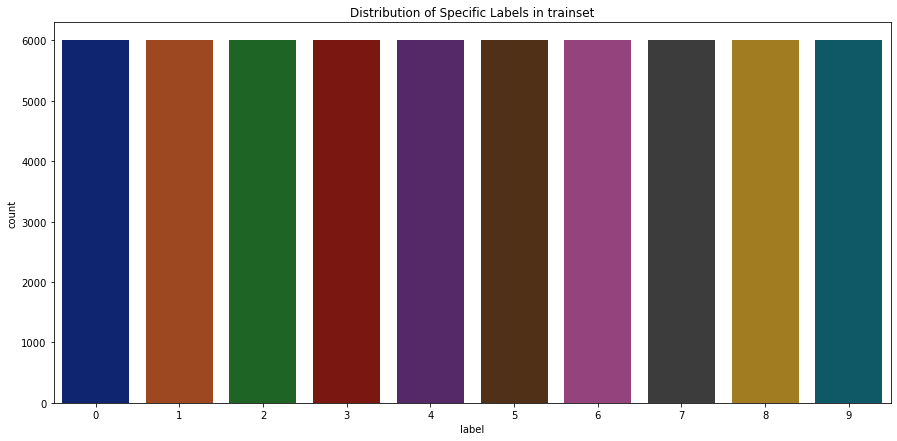

In [5]:
plt.figure(figsize=(15,7))
g = sns.countplot(Y_train, palette="dark")
plt.title("Distribution of Specific Labels in trainset")
Y_train.value_counts()

0    1000
1    1000
2    1000
3    1000
8    1000
6    1000
5    1000
4    1000
7    1000
9    1000
Name: label, dtype: int64

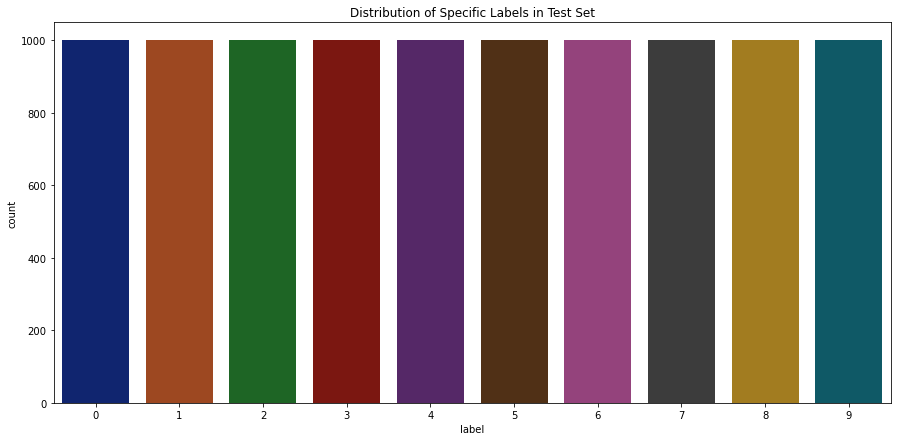

In [6]:
plt.figure(figsize=(15,7))
g = sns.countplot(Y_test, palette="dark")
plt.title("Distribution of Specific Labels in Test Set")
Y_test.value_counts()

#### Find unique numbers from the train labels

In [7]:
classes = np.unique(Y_train)
nClasses = len(classes)
classes1 = np.unique(Y_test)
nClasses1 = len(classes1)
print('The total number of unique labels is Y_train : ', nClasses)
print('The unique labels are: ', classes)
print('The total number of unique labels is Y_test : ', nClasses1)
print('The unique labels are: ', classes1)

The total number of unique labels is Y_train :  10
The unique labels are:  [0 1 2 3 4 5 6 7 8 9]
The total number of unique labels is Y_test :  10
The unique labels are:  [0 1 2 3 4 5 6 7 8 9]


### Plot Some samples

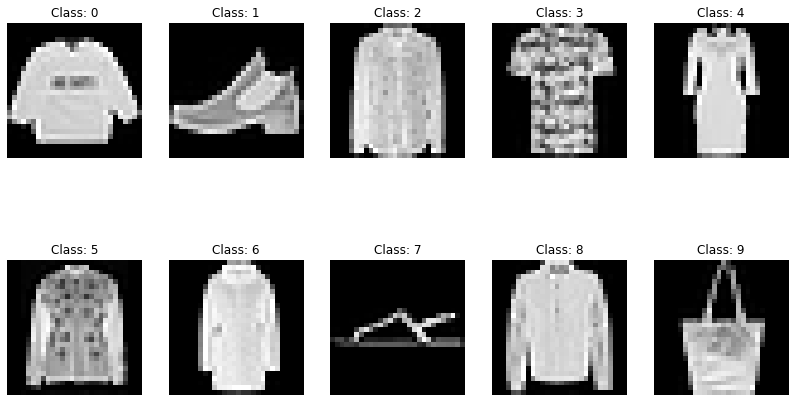

In [8]:
plt.figure(figsize = (14,8))

for i in range(10):
    plt.subplot(2, 5, i+1)
    img = X_train.iloc[i].to_numpy()
    img = img.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.title("Class: " + str(i))
    plt.axis("off")
    
plt.show()

### Data Preprocessing 

#### Reshaping

In [9]:
train_X = X_train.values.reshape(-1, 28,28, 1)
test_X = X_test.values.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

The data right now is in an int8 format, so before you feed it into the network you need to convert its type to float32, and you also have to rescale the pixel values in range 0 - 1 inclusive. So let's do that!

#### Normalization:

In [10]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

#### One-Hot Encoding

In [11]:
train_Y_one_hot = to_categorical(Y_train)
test_Y_one_hot = to_categorical(Y_test)

# Display the change for category label using one-hot encoding
print('Original label:', Y_train[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 2
After conversion to one-hot: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


### Split Dataset into Train and Validation

In [12]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [13]:
print('Train data shape is:', train_X.shape)
print('Train Label data shape is:', train_label.shape)
print('Validation data shape is:', valid_X.shape)
print('Validation label data shape is:', valid_label.shape)

Train data shape is: (48000, 28, 28, 1)
Train Label data shape is: (48000, 10)
Validation data shape is: (12000, 28, 28, 1)
Validation label data shape is: (12000, 10)


### Building the Neural Network

### Model the data

First, let's import all the necessary modules required to train the model.

In [23]:
import keras
from keras.models import Sequential,Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import LeakyReLU
batch_size = 64
epochs = 5
num_classes = 10

I built the CNN in Keras. I began by adding the first convolutional layer with Conv2D() and continued with stacking . Note that you use this function because you're working with images! Next, you add the Leaky ReLU activation function which helps the network learn non-linear decision boundaries. Since you have ten different classes, you'll need a non-linear decision boundary that could separate these ten classes which are not linearly separable.

More specifically, you add Leaky ReLUs because they attempt to fix the problem of dying Rectified Linear Units (ReLUs). The ReLU activation function is used a lot in neural network architectures and more specifically in convolutional networks, where it has proven to be more effective than the widely used logistic sigmoid function. -The ReLU function allows the activation to be thresholded at zero. However, during the training, ReLU units can "die". This can happen when a large gradient flows through a ReLU neuron: it can cause the weights to update in such a way that the neuron will never activate on any data point again. If this happens, then the gradient flowing through the unit will forever be zero from that point on. Leaky ReLUs attempt to solve this: the function will not be zero but will instead have a small negative slope.

Next, you'll add the max-pooling layer with MaxPooling2D() and so on. The last layer is a Dense layer that has a softmax activation function with 10 units, which is needed for this multi-class classification problem.

In [15]:
mnist_model = Sequential()
mnist_model.add(Conv2D(32, kernel_size=(5, 5),activation='linear',input_shape=(28,28,1),padding='same'))
mnist_model.add(LeakyReLU(alpha=0.1))
mnist_model.add(MaxPooling2D((2, 2),padding='same'))
mnist_model.add(Conv2D(64, (5, 5), activation='linear',padding='same'))
mnist_model.add(LeakyReLU(alpha=0.1))
mnist_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
mnist_model.add(Conv2D(128, (5, 5), activation='linear',padding='same'))
mnist_model.add(LeakyReLU(alpha=0.1))                  
mnist_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
mnist_model.add(Conv2D(256, (5, 5), activation='linear',padding='same'))
mnist_model.add(LeakyReLU(alpha=0.1))                  
mnist_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
mnist_model.add(Conv2D(512, (5, 5), activation='linear',padding='same'))
mnist_model.add(LeakyReLU(alpha=0.1))                  
mnist_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
mnist_model.add(Flatten())
mnist_model.add(Dense(512, activation='linear'))
mnist_model.add(LeakyReLU(alpha=0.1))                  
mnist_model.add(Dense(num_classes, activation='softmax'))

2022-08-01 22:46:40.758341: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Compile Model

After the model is created, you compile it using the Adam optimizer, one of the most popular optimization algorithms. You can read more about this optimizer here. Additionally, you specify the loss type which is categorical cross entropy which is used for multi-class classification, you can also use binary cross-entropy as the loss function. Lastly, you specify the metrics as accuracy which you want to analyze while the model is training.

In [16]:
mnist_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

Let's visualize the layers that you created in the above step by using the summary function. This will show some parameters (weights and biases) in each layer and also the total parameters in your model.

In [17]:
mnist_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                    

### Train the model

It's finally time to train the model with Keras' fit() function! The model trains for 20 epochs. 

In [18]:
mnist_train = mnist_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/5
750/750 [==============================] - 864s 1s/step - loss: 0.5088 - accuracy: 0.8077 - val_loss: 0.3657 - val_accuracy: 0.8606
Epoch 2/5
750/750 [==============================] - 1444s 2s/step - loss: 0.2997 - accuracy: 0.8896 - val_loss: 0.2726 - val_accuracy: 0.9008
Epoch 3/5
750/750 [==============================] - 800s 1s/step - loss: 0.2491 - accuracy: 0.9080 - val_loss: 0.2715 - val_accuracy: 0.9033
Epoch 4/5
750/750 [==============================] - 818s 1s/step - loss: 0.2186 - accuracy: 0.9191 - val_loss: 0.2882 - val_accuracy: 0.9025
Epoch 5/5
750/750 [==============================] - 797s 1s/step - loss: 0.1896 - accuracy: 0.9288 - val_loss: 0.2390 - val_accuracy: 0.9118


I trained the model on the fashion-MNIST dataset for 5 epochs. The model performed very will with a training accuracy of 92% and training loss of 0.1896. The validation accuracy is 91% indicating that the model is not overfitting.

### Model evaluation on the Test set

In [19]:
test_eval = mnist_model.evaluate(test_X, test_Y_one_hot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.23286262154579163
Test accuracy: 0.9153000116348267


The accuracy of the model on the test data is 91.53%. In order to evaluate the model better, it is important to plot the accuracy and loss plots between training and validation data. The test loss was at 0.2328.

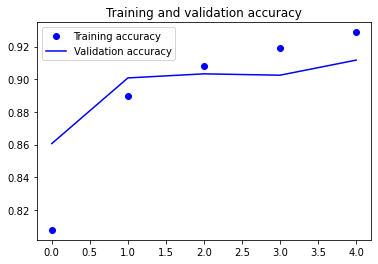

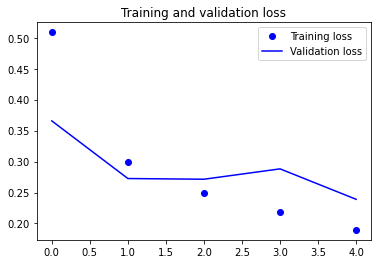

In [20]:
accuracy = mnist_train.history['accuracy']
val_accuracy = mnist_train.history['val_accuracy']
loss = mnist_train.history['loss']
val_loss = mnist_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

We can observe from the model graph above that there is no overfitting. The model train accuracy and validation accuracy increased almost at the same rate. That is the same with the validation loss and the training loss. The decline in loss occured at the same rate.

### Predict Labels

In [25]:
pred_class = mnist_model.predict(test_X)
pred_class = np.argmax(np.round(pred_class),axis=1)
pred_class.shape, Y_test.shape

313/313 [==============================] - 10s 30ms/step


((10000,), (10000,))

In [27]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(Y_test, pred_class, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.71      0.93      0.80      1000
     Class 1       0.99      1.00      0.99      1000
     Class 2       0.85      0.87      0.86      1000
     Class 3       0.93      0.93      0.93      1000
     Class 4       0.89      0.84      0.86      1000
     Class 5       0.99      0.97      0.98      1000
     Class 6       0.87      0.66      0.75      1000
     Class 7       0.94      0.97      0.96      1000
     Class 8       1.00      0.97      0.98      1000
     Class 9       0.97      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



It is evident that the classifier is underperforming for class 6 given the relatively low precision of 87% and low recall of 66%. The classifier also performed poorly in classifying classes 0 and 2 given their relatively low recall and precision scores. The three classes (0,2 and 6) are images of a long-sleeved shirt and hence explain why the model had some difficulty in distinguishing between each of them.